Final Project
=============


Dataset: http://mlr.cs.umass.edu/ml/datasets/Wine+Quality
Data Source: http://mlr.cs.umass.edu/ml/datasets/Wine+Quality 
Dataset Description: http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality.names 


Project Questions
================

** What is the question you hope to answer? **

- Wine making is considered an art. But is there a formula for a quality wine?
- What basic properties are the formula for a good wine?
- Do white wine and red wine share the same formula?


** What data are you planning to use to answer that question? **

- I'll be using both datasets. Conducting data analysis and apply ML models to each of the dataset.
- Keep all 12 features.



** What do you know about the data so far? **

- The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

- The two original datasets are of different sizes (1599 vs 4898).

- For both original datasets, all columns consist of numnerical values. 

- No missing values for both original datasets.

- The combined master dataset has a sample size of 6497. The number is sufficient to support any ML model. 

** Why did you choose this topic? **

- Personal interest in wine. I'm trying to explore wine tasting as a hobby. 

**STEP 1. Clean and analyze the dataset**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb

%matplotlib inline

Take a peek at the data

In [81]:
!head -10 'winequality-white.csv'

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


In [82]:
!head -10 'winequality-red.csv'

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [83]:
#Load Data

#names=['fx_acd','vol_acd','cir_acd','res_sgr','chlor','fr_SO2','tl_SO2','den','pH','sulph','alchl','quality']

data_white = pd.read_csv('winequality-white.csv',sep=';',header=0)
data_red = pd.read_csv('winequality-red.csv',sep=';',header=0)

In [84]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [85]:
data_white.mean(axis=0)

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [86]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [87]:
data_red.mean(axis=0)

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [88]:
data_red.shape

(1599, 12)

In [89]:
data_white.shape

(4898, 12)

In [90]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [91]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [92]:
data_red.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [93]:
data_white.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

I notice the gap in sample size between two datasets. One (red wine) with 1599 observations, one (white wine) with 4898. Since 1599 is quite a large sample size, I would not consider having 3X the size of one sample will have a material impact on the modelling results.

In [94]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [95]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Looking into the features:**

There are no missing values. What about outliers? I did some research into the attributes and the way they contribute to the complexity of wines and have the following findings:

[References: http://waterhouse.ucdavis.edu/whats-in-wine;
             http://winefolly.com/]



The expected level for some of the physiochemical attributes are:
 
1,500 - 14,500 mg/L tartaric acid;
0 - 500 mg/L citric acid;
0 - 3 g/L volatile acid;
10 - 350 mg/L sulphates;

However I find these range levels are still vague in terms of determining outliers. Reasons are: 

1) "The predominant fixed acids found in wines are tartaric, malic, citric, and succinic." Looks like there are some overlapping between fixed acidity and citric acid here. Same overlapping effect occurs between free sulfur dioxide and total sulfur dioxide.

2) Wine making is an art. There are no hard line on certain physiochemical levels except for country-specific wine making laws, whose effect is eliminated here since all the wine samples were taken from Portugal. That is to say, each component's level range really depends on enologists' preferences. 




Nevertheless, we can try to detect the noises in the datasets from a visual perspective.


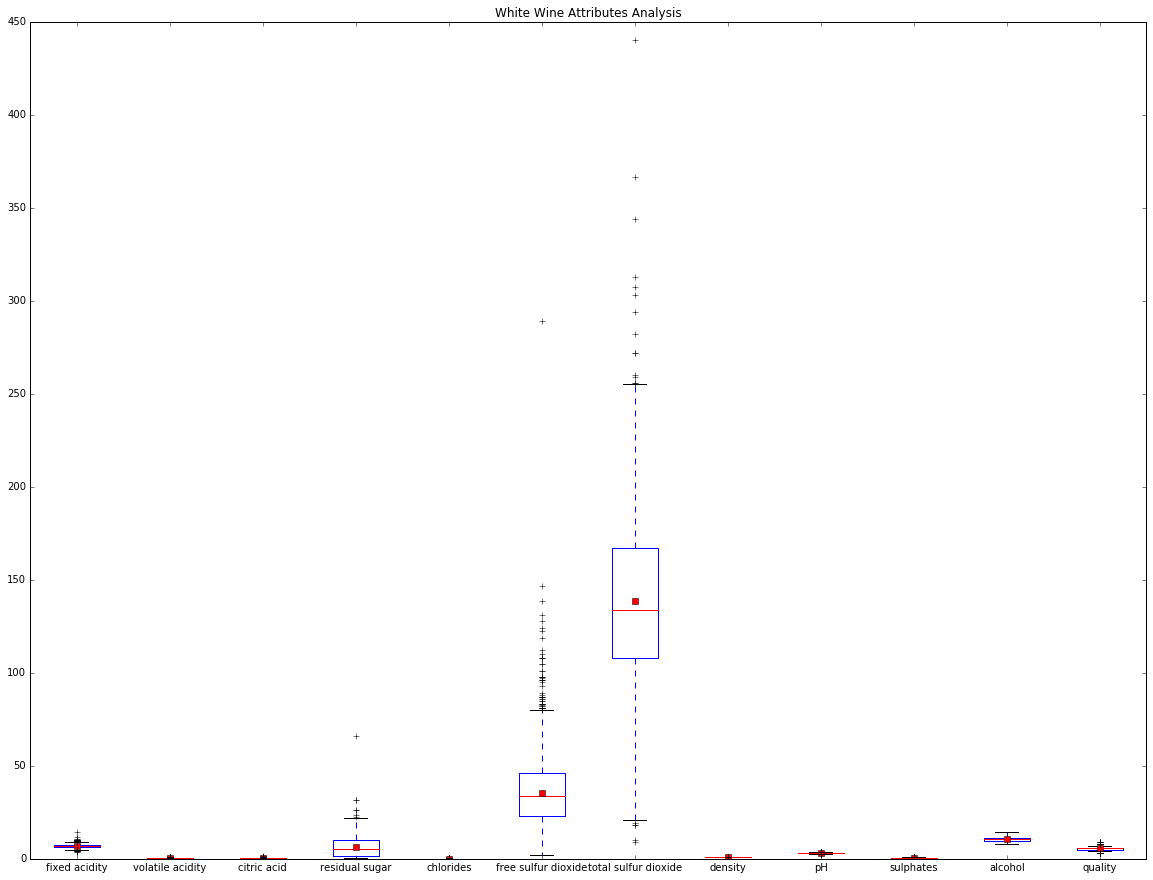

In [96]:
data_white.plot(kind='box',showmeans=True,figsize=(20,15));

plt.title('White Wine Attributes Analysis')

plt.show()


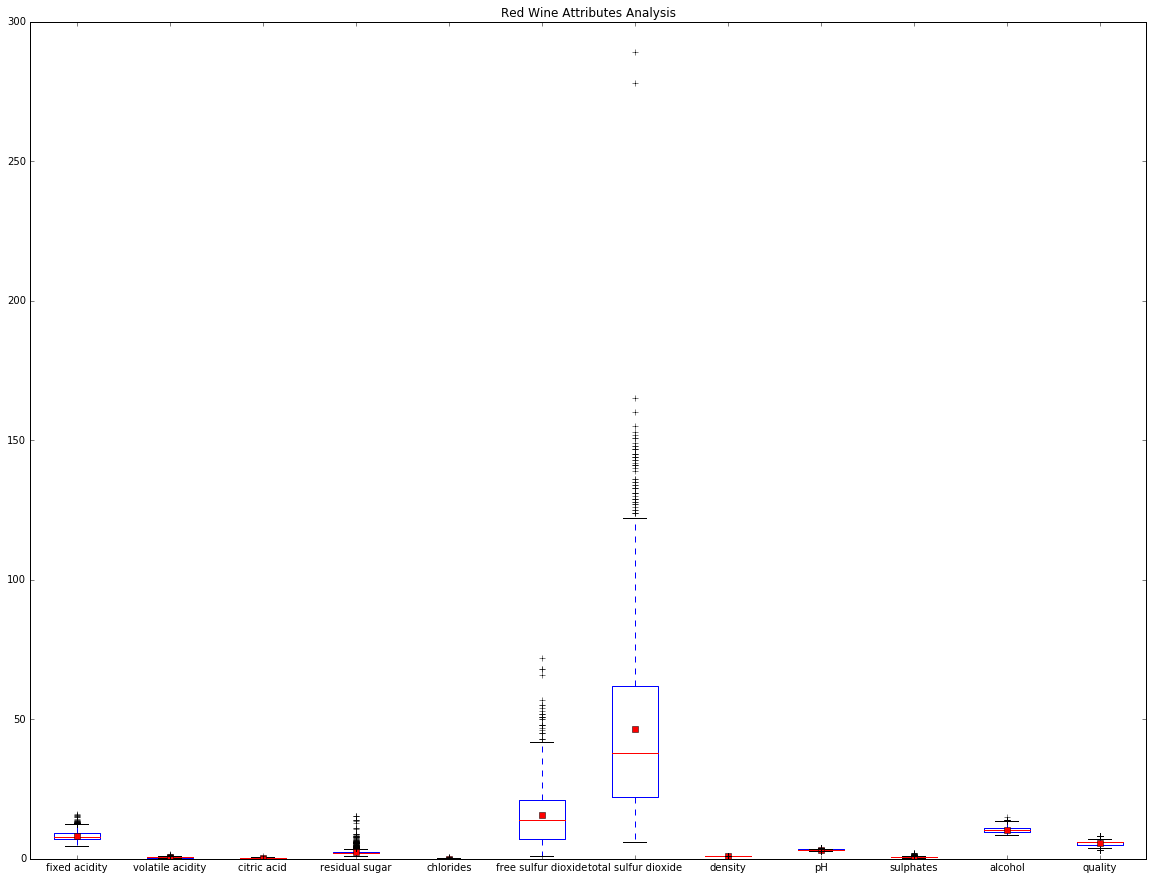

In [97]:
data_red.plot(kind='box',showmeans=True,figsize=(20,15));

plt.title('Red Wine Attributes Analysis')

plt.show()

From the above two box plots, I notice some prominent outlying values in features 'free sulfur dioxide' and 'total sulfur dioxide', which will contribute to the source of errors in model training.

In [1]:
#Take a look at the feature correlations

plt.subplot(121)
plt.title('White Wine Dataset Correlation')
heatmap = plt.pcolor(data_white.corr())

plt.subplot(122)
plt.title('Red Wine Dataset Correlation')
heatmap = plt.pcolor(data_red.corr())


NameError: name 'plt' is not defined

**STEP 2. Apply Supervised Learning Models**

In [3]:
#Split the data into training and test sets

from sklearn.cross_validation import train_test_split

red_q = data_red['quality']
red_X = data_red.drop('quality', axis=1)

white_g = data_white['quality']
white_X = data_white.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(red_X, red_q 
                                                    test_size=0.2, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(white_X, white_q 
                                                    test_size=0.2, random_state=7)

SyntaxError: invalid syntax (<ipython-input-3-9d6042ba2960>, line 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [ ]:
`from sklearn.linear_model import Lasso

In [ ]:
white = pd.DataFrame(data_white.mean(axis=0))

white.columns=['White']

white

In [ ]:
red=pd.DataFrame(data_red.mean(axis=0))

red.columns=['Red']

red

In [ ]:
wr=pd.concat([white, red], axis=1)

wr

In [ ]:
white_red = pd.DataFrame(wr, columns=['White','Red'])

white_red.plot(kind='bar',figsize=(12,8));

In [ ]:
#Add one column to each dataset so they can be identified after the merge.

#Type 1 is White Wine; Type 2 is Red Wine.

data_white['type'] =1

data_red['type'] =0

In [ ]:
#Concatenate two original datasets

wine = pd.concat([data_white,data_red])

#Take a look at the new dataset

wine.head()

In [ ]:
wine.info()

In [ ]:
wine.describe()

In [ ]:
wine.corr()

In [ ]:
plt.figure(figsize=(20,10))
pd.tools.plotting.parallel_coordinates(wine, 'type')
